In [1]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load data
df = pandas.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Split data into majority (legitimate) and minority (fraudulent)
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

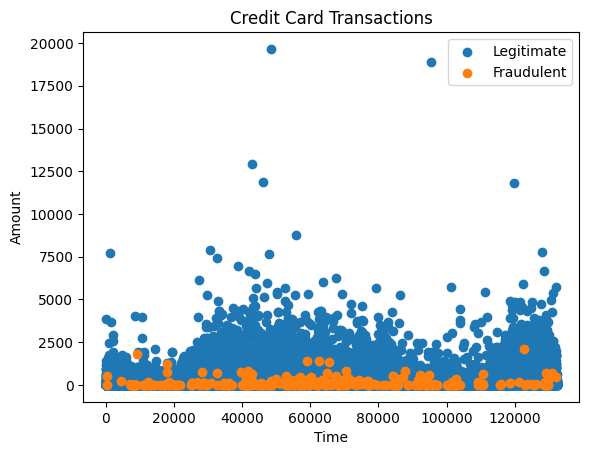

In [4]:
# Check for class imbalance
pyplot.scatter(df.iloc[legit.index]['Time'], df.iloc[legit.index]['Amount'], label = 'Legitimate')
pyplot.scatter(df.iloc[fraud.index]['Time'], df.iloc[fraud.index]['Amount'], label = 'Fraudulent')
pyplot.title('Credit Card Transactions')
pyplot.xlabel('Time')
pyplot.ylabel('Amount')
pyplot.legend()
pyplot.show()

In [5]:
# Randomly sample the legitimate data to match the number with fradulent
legit_balanced = legit.sample(n = len(fraud))

In [6]:
# Combine the balanced legitimate with the fraudulent
df_balanced = pandas.concat([legit_balanced, fraud])

In [7]:
# Preprocess balanced data
X = df_balanced.drop('Class', axis = 1)
y = df_balanced['Class']

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Logistic Regression

In [9]:
# Create and train logistic regression model
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [10]:
# Make prediction using logistic regression model
lr_y_pred = lr_model.predict(X_test)

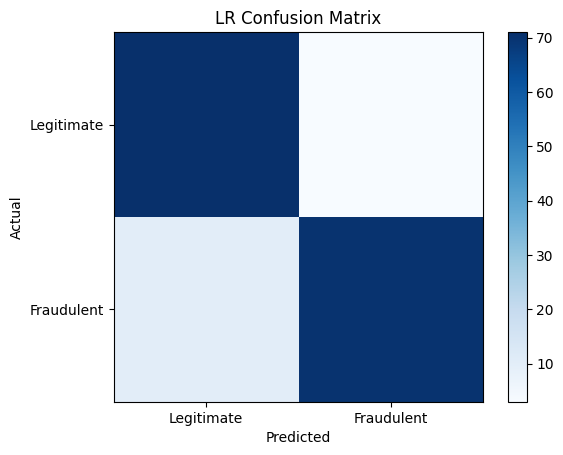

In [11]:
# Logistic regression confusion matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)
pyplot.imshow(lr_cm, cmap = 'Blues')
pyplot.title('LR Confusion Matrix')
pyplot.colorbar()
pyplot.xticks([0, 1], ['Legitimate', 'Fraudulent'])
pyplot.yticks([0, 1], ['Legitimate', 'Fraudulent'])
pyplot.xlabel('Predicted')
pyplot.ylabel('Actual')
pyplot.show()

In [12]:
# Get logistic regression classification report
lr_report = classification_report(y_test, lr_y_pred, target_names = ['Legitimate', 'Fraudulent'])

#### Decision Tree

In [13]:
# Create and train decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# Make prediction using  decision tree model
dt_y_pred = dt_model.predict(X_test)

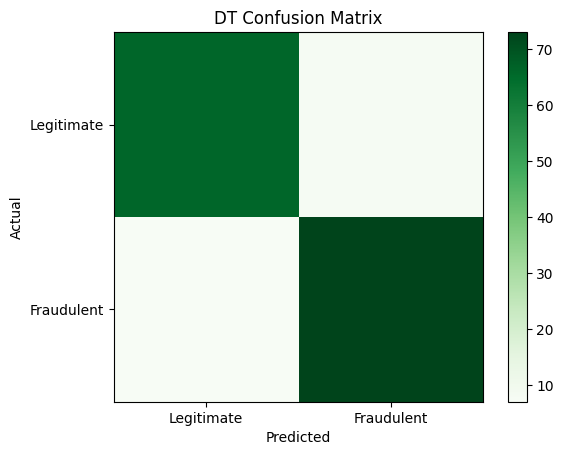

In [15]:
# Decision tree confusion matrix
dt_cm = confusion_matrix(y_test, dt_y_pred)
pyplot.imshow(dt_cm, cmap = 'Greens')
pyplot.title('DT Confusion Matrix')
pyplot.colorbar()
pyplot.xticks([0, 1], ['Legitimate', 'Fraudulent'])
pyplot.yticks([0, 1], ['Legitimate', 'Fraudulent'])
pyplot.xlabel('Predicted')
pyplot.ylabel('Actual')
pyplot.show()

In [16]:
# Get decision tree classification report
dt_report = classification_report(y_test, dt_y_pred, target_names = ['Legitimate', 'Fraudulent'])

#### Random Forest

In [17]:
# Create and train random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# Make prediction using random forest model
rf_y_pred = rf_model.predict(X_test)

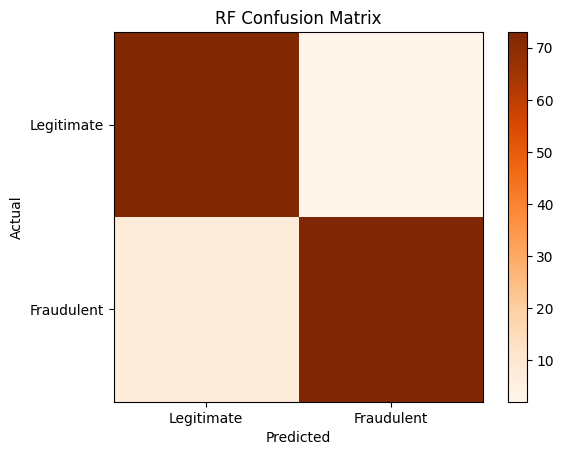

In [19]:
# Random forest confusion matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
pyplot.imshow(rf_cm, cmap = 'Oranges')
pyplot.title('RF Confusion Matrix')
pyplot.colorbar()
pyplot.xticks([0, 1], ['Legitimate', 'Fraudulent'])
pyplot.yticks([0, 1], ['Legitimate', 'Fraudulent'])
pyplot.xlabel('Predicted')
pyplot.ylabel('Actual')
pyplot.show()

In [20]:
# Get random forest classification report
rf_report = classification_report(y_test, rf_y_pred, target_names = ['Legitimate', 'Fraudulent'])

### results.md

In [21]:
with open('results.md', 'w') as file:
    file.write("# Results\n")
    file.write("## Logistic Regression\n")
    file.write(lr_report)
    file.write("\n\n")
    file.write("## Decision Tree\n")
    file.write(dt_report)
    file.write("\n\n")
    file.write("## Random Forest\n")
    file.write(rf_report)